## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

## Objective is to build a multiple linear regression model for the prediction of demand for shared bikes. 

### The solution is divided into the following steps:

 - Reading and Understanding the Data
 - Visualising the Data
 - Data Preparation
 - Splitting the Data into Training and Testing Sets
 - Rescaling the Features
 - Building a linear model
 - Residual Analysis of the train data
 - Making Predictions Using the Final Model
 - Model Evaluation

### Step 1: Reading and Understanding the Data

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#import the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data and do preliminary analysis

In [2]:
#load/read the given csv and check how is it looking
bike_data = pd.read_csv('day.csv')

# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [3]:
#Now let's get some info on the data by checking number of rows and columns in the dataset
bike_data.shape

(730, 16)

In [4]:
# Summary of the dataset: 730 rows, 16 columns, no null values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Getting insights of the features
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Since the difference between mean and median is not much , we can conclude that data has no outliers

### Step 2: Visualising the numeric and catergorical data to understand the correlations quickly

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Now let's visualize numeric data and making pairplots

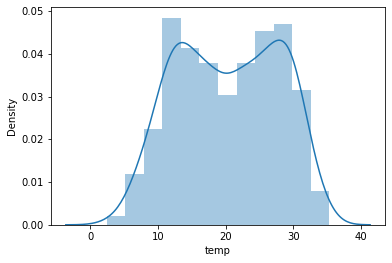

In [6]:
# temperature
sns.distplot(bike_data['temp'])
plt.show()

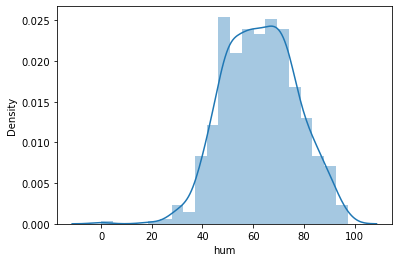

In [7]:
# Humidity
sns.distplot(bike_data['hum'])
plt.show()

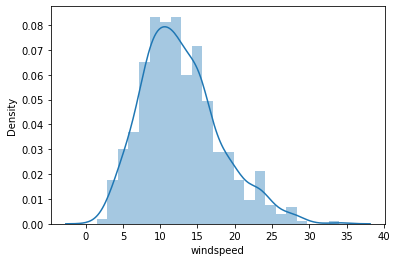

In [8]:
# wind speed
sns.distplot(bike_data['windspeed'])
plt.show()

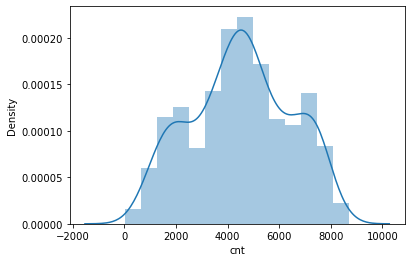

In [9]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike_data['cnt'])
plt.show()

In [ ]:
#Now let's visualize numeric data and making pairplots
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables

In [ ]:
#Now let's visualize categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

### Step 3: Data Preparation (creating the dummy variables and dropping original columns)

In [ ]:
## dropping columns that are irrelevant for the model - 
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

In [ ]:
### Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

## maping seasons
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

## mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

## mapping weekday
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


In [ ]:
# Check the dataframe now
bike_data.head()

#### Dummy Variables


In [ ]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [ ]:
# Now let's see the head of our dataframe.
bike_data.head()

In [ ]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
bike_data.head()

In [ ]:
bike_data.shape

### Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
# the first basic step for regression is performing a train-test split
# We specify this so that the train and test data set always have the same rows, respectively

train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 5: Rescaling the Features

The scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [ ]:
#Rescale the features
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [ ]:
train.head()

In [ ]:
#As expected, the variables have been appropriately scaled.
train.describe()

#### Do some more visualization on the final dataframe

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Heatmap - plot the correlations on a heatmap for better visualisation

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We'll first build a model using all the columns

In [ ]:
#From the above head-map, it is clear that cnt has strong correlation with 'temp', 'yr'
plt.figure(figsize=[6,6])
plt.scatter(bike_data.temp, bike_data.cnt)
plt.show()

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(bike_data.yr, bike_data.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [ ]:
#Let's do a simple linear regression first
#dividing into X and Y sets for model building

y_train = train.pop('cnt')
X_train = train

### Step 6: Building a linear model

Fit a regression line through the training data using statsmodels. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [ ]:
# Running RFE with the output number of the variable equal to 10
# creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
#rfe = RFE(lm,13)            
#rfe = rfe.fit(X_train, y_train)

# setting feature selection variables to 13
rfe = RFE(lm, n_features_to_select = 13) 

# fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

### Starting with all the columns selected by RFE

### Model 1

In [ ]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# Check the parameters obtained
lm.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lm.summary())

In [ ]:
## dropping weekday_Saturday since it has p > 0.05
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

Rebuilding the model without 'weekday_Saturday'

### Model 2

In [ ]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

### Checking VIF for multicollinearity

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### We generally need to have VIF that is less than 5 hence there are clearly some variables we need to drop

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Model 3 (Final model)

In [ ]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit() 

# Check the summary
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Step 7: Residual Analysis of the train data

Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression). So let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)

# Plot heading
fig.suptitle('Error Terms', fontsize = 20)                   

# X-label
plt.xlabel('Errors', fontsize = 18)                         

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [ ]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

test.describe()

#### Dividing into X_test and y_test

In [ ]:
y_test = test.pop('cnt')
X_test = test

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [ ]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

In [ ]:
# Making predictions using the fourth model
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(X_train, X_pred)
mse_test = mean_squared_error(y_test, y_pred)
print('Mean squared error of the test set is', mse_test)

### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)

# Plot heading
fig.suptitle('y_test vs y_pred', fontsize = 20)               

# X-label
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
# finding out the mean squared error 

test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the test set is', test_mse)

#### Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

In [ ]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

We can see that the equation of our best fitted line is:

cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X season_Winter - 0.066942 X season_ Spring + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed

#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

#### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays

This indicates that the bike rentals is majorly affected by temperature,season and month.

#### Conclusion:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

- The R-squared value of the train set is 82.1% whereas the test set has a value of 80.88% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

- Our developed model's mean squared error is close to 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set.

- The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

- We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not.

- Additionally more rentals seem to be demanded on the winters as compared to the summer and spring.

- We had observed that the months of September and October had higher use of rentals.

- In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays.

#### Recommendations:

- These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people.

- One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals.

- Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers.

- There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals.

- Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.